In [19]:
# Classification Examples

# Ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

colors = ['#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00']

# Load data
data = pd.read_csv('../data/diabetes.csv')

# Get data headers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
# Separate out classfiers
X = data.copy().drop(columns=['Outcome'])
y = data.copy()['Outcome']

# Standardize values
clean_data = data.copy()
ss = StandardScaler()
ss.fit(X)
X[:] = ss.transform(X)

# Generate training and testing set: 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

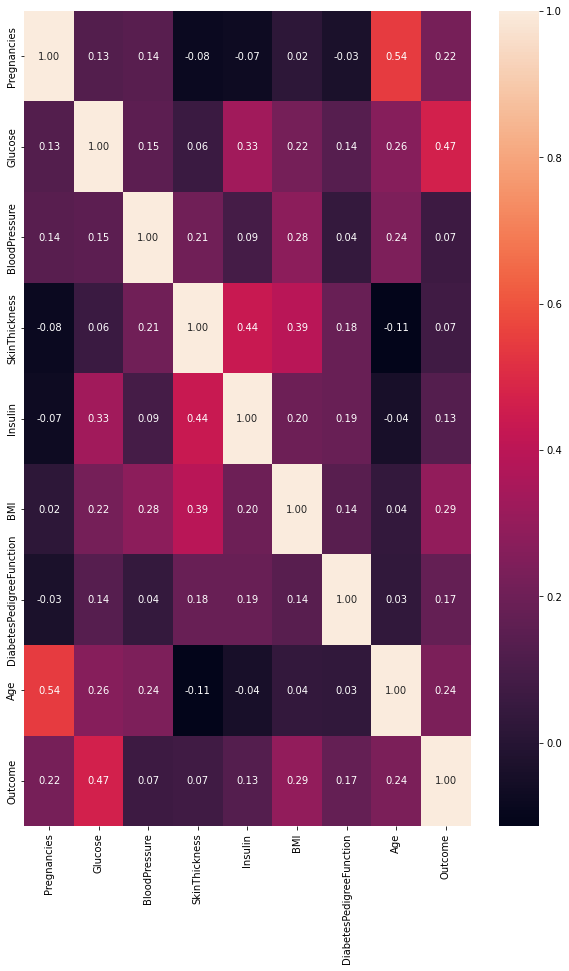

In [21]:
from pylab import rcParams
def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 10, 15
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')

# load your data 
data  = pd.read_csv('../data/diabetes.csv')

# plot correlation & densities
plot_correlation(data)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

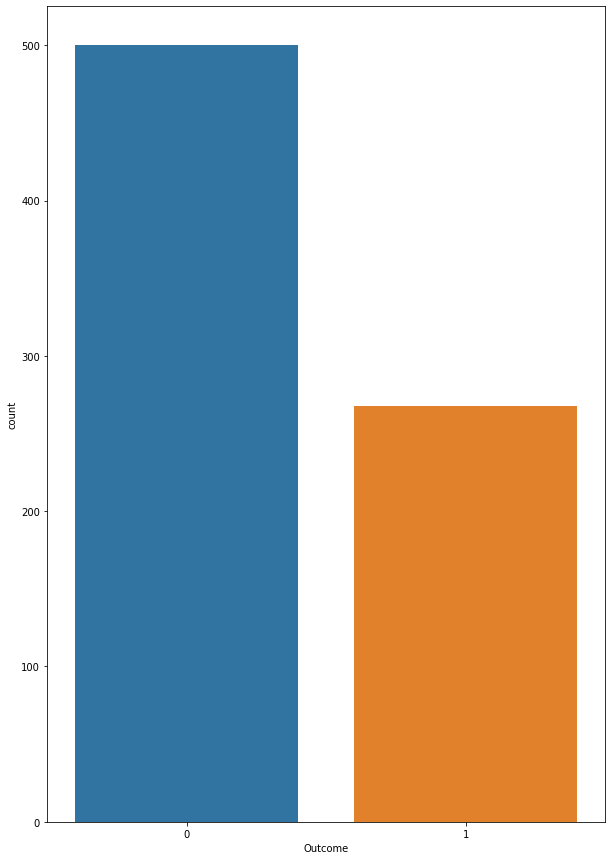

In [22]:
# outcome more correlated with Glucose and BMI
# correlation between Glucose and BMI only 0.22
sns.countplot(data['Outcome'])

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

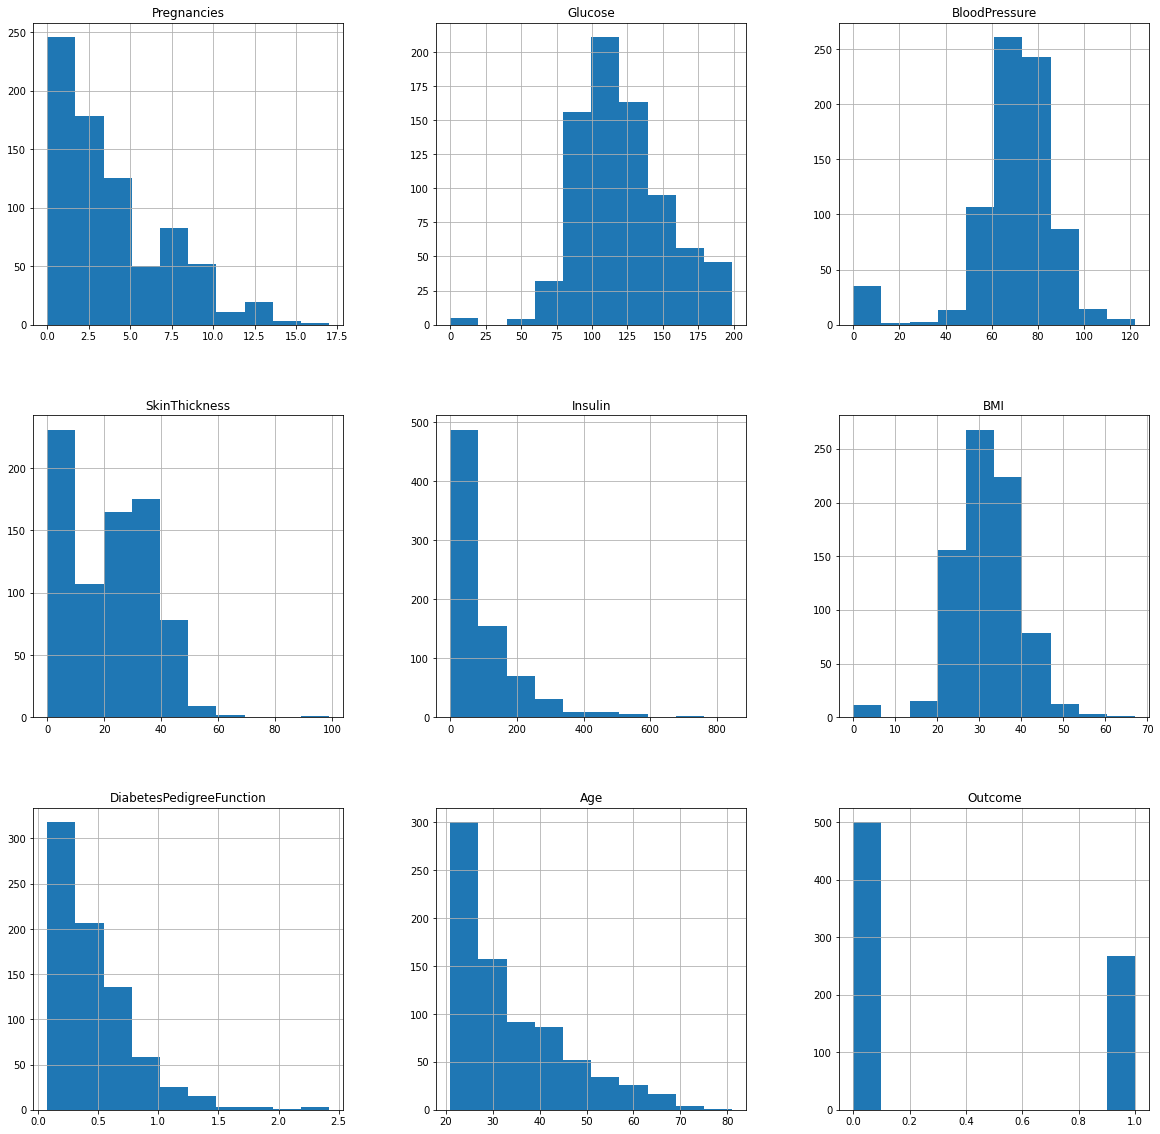

In [23]:

data.hist(figsize=(20,20))

In [24]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
# Prepare data

# Drop columns
drop_columns = ['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']
new_data = data.drop(columns=drop_columns).copy()

# Separate out classfiers
X_d = new_data.copy().drop(columns=['Outcome'])
y_d = new_data.copy()['Outcome']

# Standardize values
clean_data_d = new_data.copy()
ss_d = StandardScaler()
ss_d.fit(X_d)
X_d[:] = ss_d.transform(X_d)

# Generate training and testing set: 25%
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.25, random_state=0)

In [26]:
new_data

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1
...,...,...,...,...,...
763,10,101,32.9,63,0
764,2,122,36.8,27,0
765,5,121,26.2,30,0
766,1,126,30.1,47,1


In [27]:
from sklearn.decomposition import PCA
# reduce dimensionality to 2
pca_model = PCA(n_components=2)
pca_model.fit(X_d_train)
X_d_train = pca_model.transform(X_d_train)
X_d_test = pca_model.transform(X_d_test)

# 2-Dimensions
X_d_train[:20]

array([[ 0.33549605, -1.93564445],
       [-1.13857204,  0.47986118],
       [-1.4484311 , -0.00384077],
       [ 3.2270154 , -0.11838912],
       [ 1.7001478 ,  0.37772821],
       [-0.14848438,  0.72142749],
       [-1.77534255, -0.47144816],
       [ 1.4645614 , -0.65594528],
       [-1.38546714, -0.56216564],
       [-1.36126093, -0.19293654],
       [-0.37260847, -1.11282288],
       [ 1.65397928, -0.53743965],
       [-1.30984789,  0.46234882],
       [-1.59744534, -0.17740719],
       [-0.39779543,  0.13693417],
       [-1.40050876,  0.74446253],
       [-0.37869682,  0.23537369],
       [-1.55503149, -0.45786451],
       [-1.48299428,  0.60613106],
       [-1.57394205, -0.33072647]])

In [28]:
# change k here to view change
k = 10

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_d_train, y_d_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
y_predict = knn_model.predict(X_d_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

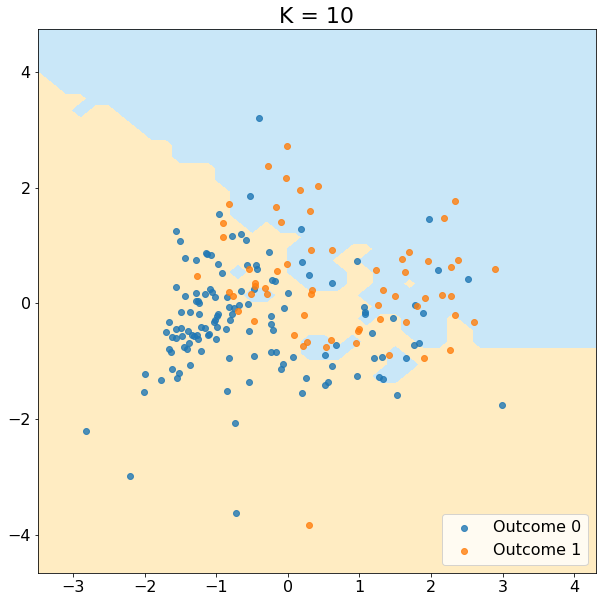

In [30]:
import matplotlib.pyplot as plt 
import matplotlib

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.2

cmap_light = ListedColormap(['#FFECC2', '#C9E7F8'])


x_min, x_max = X_d_train[:, 0].min(), X_d_train[:, 0].max()
y_min, y_max = X_d_train[:, 1].min(), X_d_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_d_test):
    indices = np.where(y_d_test == label)
    plt.scatter(X_d_test[indices, 0], X_d_test[indices, 1], cmap=cmap_light, alpha=0.8,
                label='Outcome {}'.format(label))

plt.legend(loc='lower right', fontsize=16)
plt.title('K = {}'.format(k), size=22)
plt.yticks(size = 16)
plt.xticks(size = 16)
plt.show()